In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
training_data = pd.read_csv('Data_CreditScoring_Train.csv', index_col='ID')
testing_data = pd.read_csv('Data_CreditScoring_Test.csv', delimiter=';')

In [5]:
print(training_data.nunique())
training_data.head()

LIMIT_BAL       76
MARRIAGE         3
EDUCATION        4
SEX              2
AGE             52
PAY_1            5
PAY_2            5
PAY_3            5
BILL_AMT1    13364
BILL_AMT2    13201
BILL_AMT3    12939
PAY_AMT1      5138
PAY_AMT2      5039
PAY_AMT3      4892
TARGET           2
dtype: int64


,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
ID,,,,,,,,,,,,,,,
1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [6]:
metrices = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3','TARGET']
categories = ['MARRIAGE','EDUCATION','SEX','PAY_1','PAY_2','PAY_3']


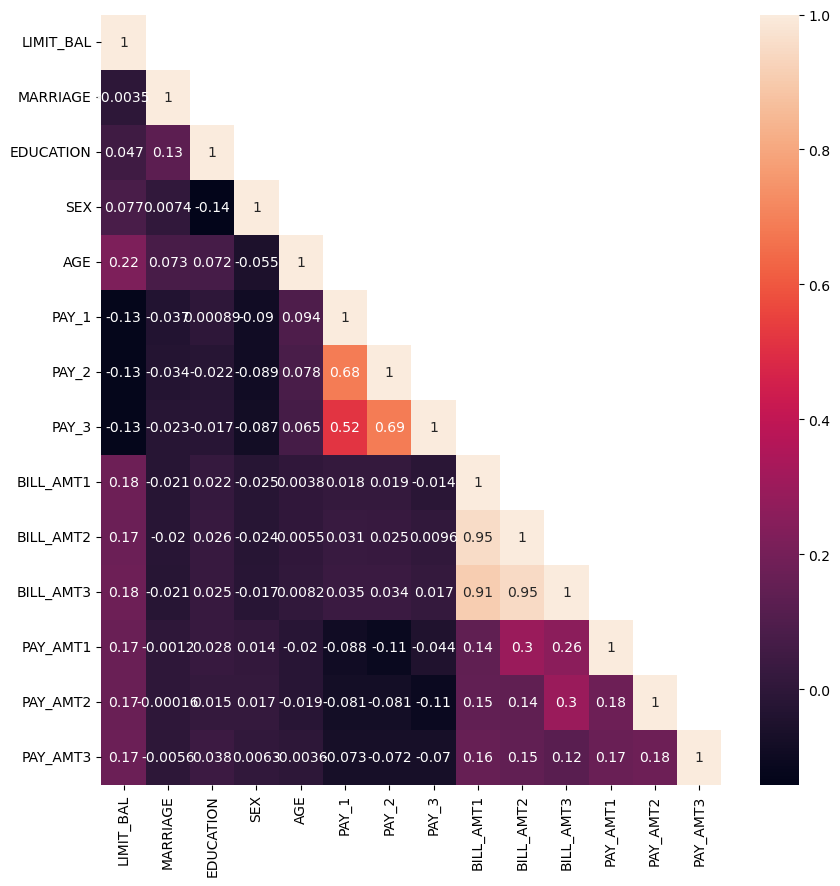

In [7]:
#train_data_corr = training_data[categories].corr()
training_data = training_data.drop(['TARGET'], axis=1)
train_data_corr = training_data.corr()
mask = np.array(train_data_corr)
mask[np.tril_indices_from(mask)] = 0

fig, ax = plt.subplots(figsize = (5,2))
fig.set_size_inches(10,10)
hm = sns.heatmap(train_data_corr, mask=mask, annot=True)


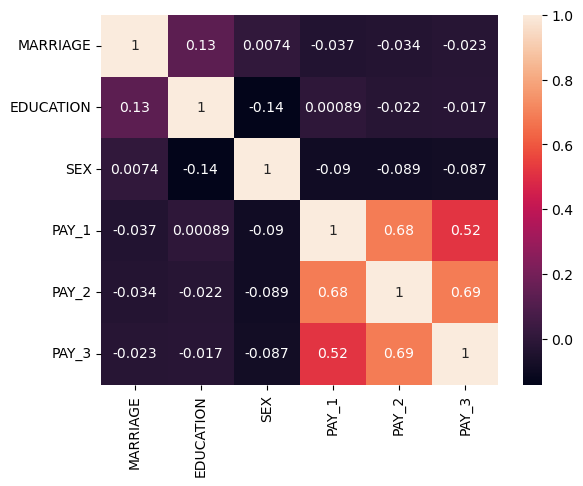

In [8]:
train_data_cat = training_data[categories].corr()
mask = np.array(train_data_cat)
np.tril_indices_from

hm = sns.heatmap(train_data_cat, annot=True)

In [9]:
training_data[['PAY_1', 'PAY_2', 'PAY_3']].value_counts().head(3)

PAY_1  PAY_2  PAY_3
0      0      0        10722
1      0      0         1004
2      2      2          983
dtype: int64

## Get historical charts of some of the metrics

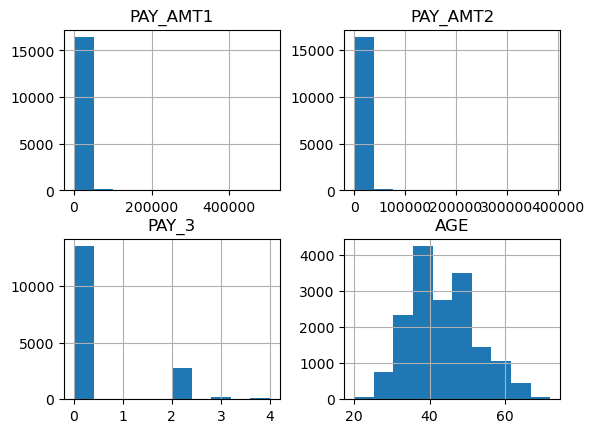

In [10]:
training_data[['PAY_AMT1', 'PAY_AMT2', 'PAY_3', 'AGE']].hist()
plt.show()

## Train Data Distribution


[Text(0.5, 0, 'age'), Text(0, 0.5, 'BILL_AMT1')]

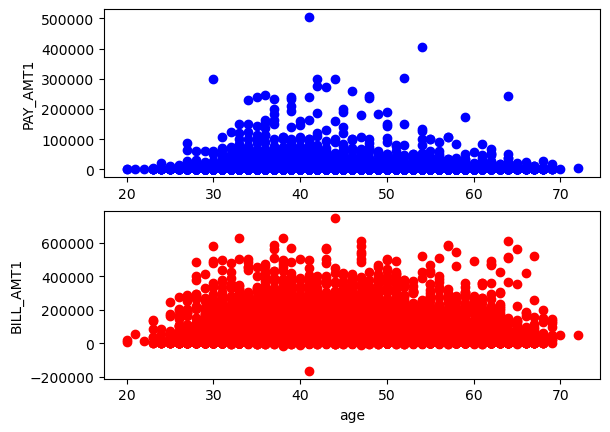

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(training_data['AGE'], training_data['PAY_AMT1'], color='blue')
ax[1].scatter(training_data['AGE'], training_data['BILL_AMT1'], color='red')
#ax[0].xlabel('AGE')
#ax.ylabel('PAY_AMT1')
ax[0].set(ylabel = 'PAY_AMT1')
ax[1].set(xlabel = 'age', ylabel='BILL_AMT1')

## Seperate train and test data randomly

[Text(0.5, 0, 'BILL_AMT1'), Text(0, 0.5, 'BILL_AMT2')]

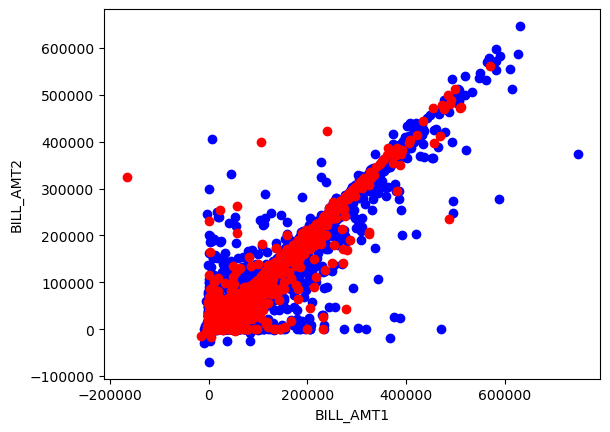

In [12]:
train_test_mask = np.random.rand(len(training_data)) < 0.8
train_data_seperated = training_data[train_test_mask]
test_data_seperated = training_data[~train_test_mask]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(train_data_seperated['BILL_AMT1'], train_data_seperated['BILL_AMT2'], color='blue')
ax.scatter(test_data_seperated['BILL_AMT1'], test_data_seperated['BILL_AMT2'], color='red')
ax.set(xlabel='BILL_AMT1', ylabel='BILL_AMT2')

## Classification Models

### 1- Linear Regression (Train)

coef =  [[0.91379682]]
intercept =  [1932.02662771]


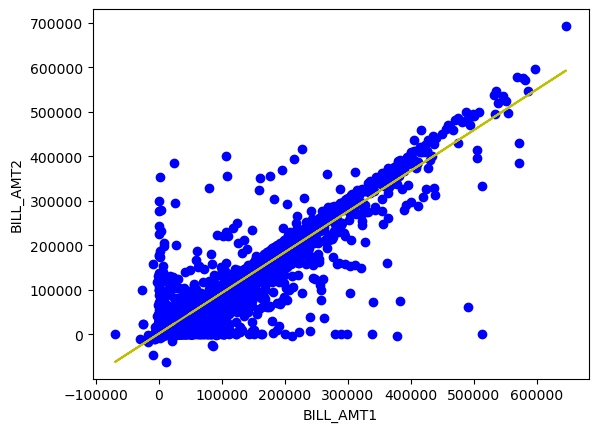

In [120]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

train_x = train_data_seperated[['BILL_AMT2']]
train_y = train_data_seperated[['BILL_AMT3']]
regr.fit(train_x, train_y)

print('coef = ', regr.coef_)
print('intercept = ', regr.intercept_)

plt.scatter(train_x, train_y, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_, '-y')
plt.xlabel('BILL_AMT1')
plt.ylabel('BILL_AMT2')
plt.show()

### Linear Regression (Test)

In [140]:
test_x = test_data_seperated[['BILL_AMT2']]
test_y = np.asanyarray(test_data_seperated[['BILL_AMT3']])
test_y_ = regr.predict(test_x)

print('Mean Absolute Error : %i' % np.mean(np.absolute(test_y - test_y_)))
print('Mean Squre Error : %i' % np.mean((test_y - test_y_)**2 ))
print('R2-score : %.2f' % r2_score(test_y, test_y_))

Mean Absolute Error : 8925
Mean Squre Error : 595883096
R2-score : 0.87


### 